**Example A:**
* We are going to use 2 layers
* Optimizer - we are going to use SGD
* We are going to use without Normalization

**Example B:**
* We are going to use 3 layers
* Optimizer - we are going to use Adam
* We are going to use without Normalization

**Example C:**
* We are going to use 2 layers
* Optimizer - we are going to use SGD
* We are going to use without Normalization and standardization

In [51]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#For Exercise C
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [4]:
insurance_data = pd.read_csv("/content/data/insurance_data.csv")
insurance_data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#use pandas method instead of OneHotEncoder/LabelEncoder
insurance_data_one_hot=pd.get_dummies(insurance_data)
insurance_data_one_hot.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,True,False,False
5,31,25.740,0,3756.62160,True,False,True,False,False,True,False


In [12]:
#Assigning charges from input to output
X = insurance_data_one_hot.drop('charges',axis=1) #axis=0 is row/axis=1 is column
y=insurance_data_one_hot['charges']

In [10]:
print ("Features are: ")
X.head(0)

Features are: 


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest


In [11]:
print ('Charges')
y.head(0)

Charges


,charges


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

In [27]:
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [31]:
insurance_model.fit(X_train,y_train,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: nan - mae: nan
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: nan - mae: nan
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: nan - mae: nan
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: nan - mae: nan
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: nan - mae: nan
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: nan - mae: nan
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: nan - mae: nan
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: nan - mae: nan
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: nan - mae: nan
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: nan - mae: nan
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: nan - mae: nan
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan - mae: nan
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: nan - mae: nan
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/s

In [42]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history_model_2=insurance_model_2.fit(X_train,y_train,epochs=200,verbose=0)

In [43]:
insurance_model_2.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 7835.4565 - mae: 7835.4565


[7835.45654296875, 7835.45654296875]

In [44]:
insurance_model_2_loss,insurance_model_2_mae=insurance_model_2.evaluate(X_test,y_test)

print("Loss:",insurance_model_2_loss)
print("MAE:",insurance_model_2_mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7835.4565 - mae: 7835.4565
Loss: 7835.45654296875
MAE: 7835.45654296875


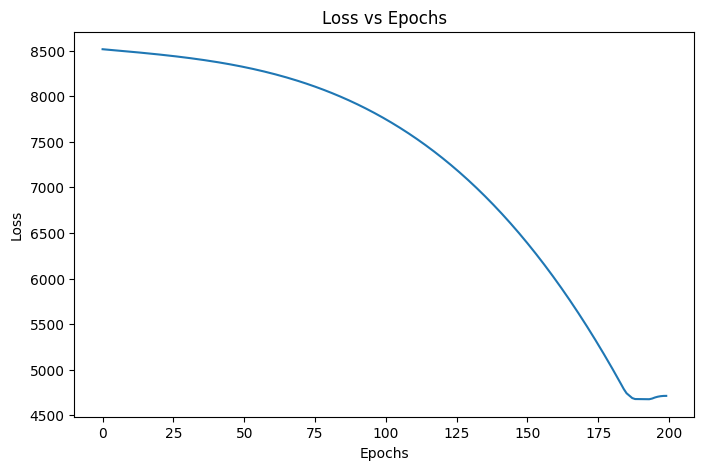

In [46]:
plt.figure(figsize=(8,5))
plt.plot(history_model_2.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

# Exercise C - 2 layers, SGD optimizers

In [47]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    )


In [54]:
x=insurance_data.drop("charges",axis=1)
y=insurance_data["charges"]

In [55]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [57]:
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [63]:
X_train
print("X-Train Shape",X_train.shape)
print("X-Train Normal Shape",X_train_normal.shape)


X-Train Shape (4, 6)
X-Train Normal Shape (4, 8)


In [58]:
X_train_normal #normalized data

array([[0.6       , 0.2948033 , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        ],
       [0.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        ],
       [0.8       , 0.59980573, 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        ]])

In [73]:
tf.random.set_seed(42)
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

model3_history=insurance_model_3.fit(X_train_normal,y_train,epochs=200,verbose=0)
#history_model_3=insurance_model_3.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [74]:
insurance_model_3.evaluate(X_test_normal,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 9142.7188 - mae: 9142.7188


[9142.71875, 9142.71875]

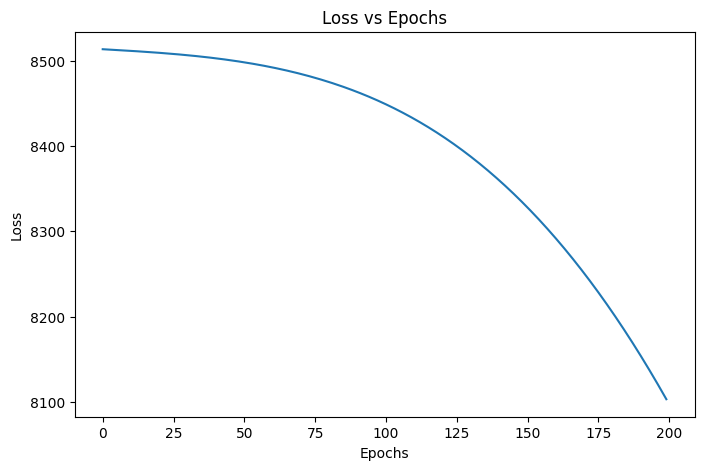

In [75]:
plt.figure(figsize=(8,5))
plt.plot(model3_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [68]:
loss, mae = insurance_model_3.evaluate(X_test_normal, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model MAE on test set: {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 9183.6025 - mae: 9183.6025
Model loss on test set: 9183.6025390625
Model MAE on test set: 9183.6025390625
